In [1]:
import pandas as pd

In [ ]:
from Ipython.core.display import HTML
css = open("style-table.css").read()+open("style-notebook.css").read()
HTML("<style>{}</style>".format(css))

In [2]:
titles=pd.read_csv("titles.csv",index_col=None)
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [3]:
cast=pd.read_csv("cast.csv",index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1.Define a year as a "Superman year" Whose films features more Superman charcters than Batman. How many years in film history have been Superman Years?

In [4]:
both = cast[(cast.character=='Superman') | (cast.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)
diff = both.Superman - both.Batman
print("Superman: " + str(len(diff[diff>0])))

Superman: 11


# 2.How many years have been "Batman years", with more Batman characters than Superman characters?

In [5]:
both = cast[(cast.character=='Superman') | (cast.character == 'Batman')].groupby(['year','character']).size().unstack().fillna(0)
diff = both.Batman - both.Superman
print("Batman: " + str(len(diff[diff>0])))

Batman: 27


# 3.Plot the number of actor roles each year and the number of actress roles each year over the history of film.

<Axes: xlabel='year'>

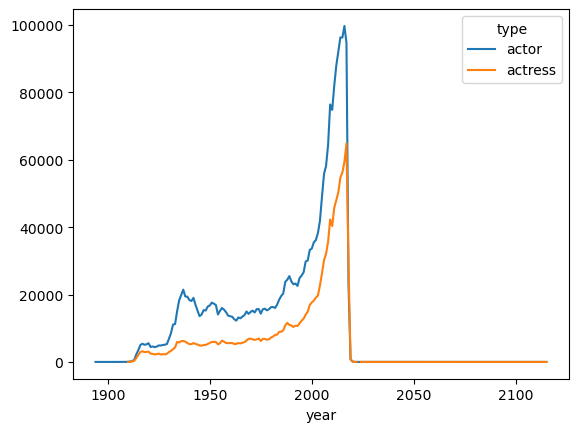

In [6]:
cast.groupby(['year','type']).size().unstack().plot()

# 4.Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<Axes: xlabel='year'>

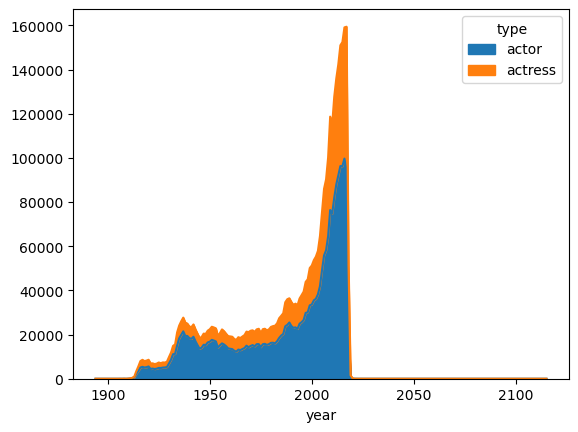

In [7]:
cast.groupby(['year','type']).size().unstack().plot(kind='area')

# 5.Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [8]:
foo = cast.groupby(['year','type']).size().unstack().fillna(0)

<Axes: xlabel='year'>

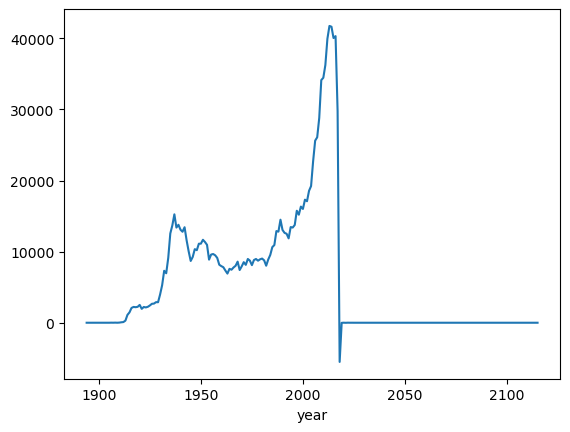

In [9]:
foo['diff'] = foo['actor']-foo['actress']
foo['diff'].plot()

# 6.Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

<Axes: xlabel='year'>

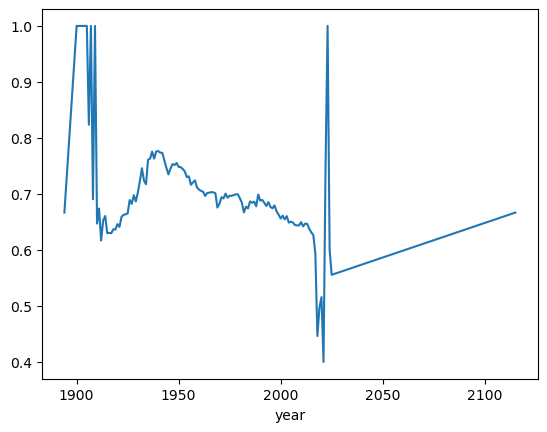

In [10]:
foo['totalRoles'] = foo['actor']+foo['actress']
foo['manFrac'] = foo['actor']/foo['totalRoles']
foo['manFrac'].plot()

# 7.Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

<Axes: xlabel='year'>

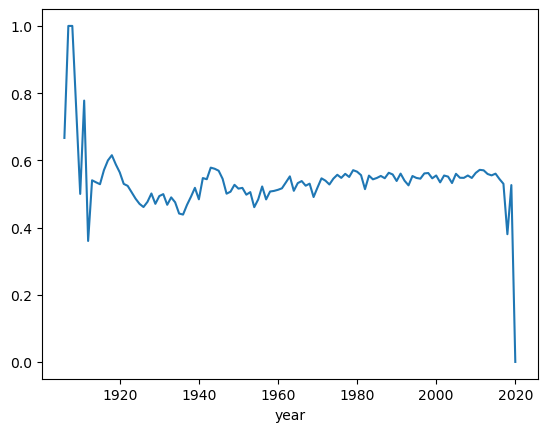

In [11]:
support = cast[cast.n==2]
bar = support.groupby(['year','type']).size().unstack().fillna(0)
bar['totalRoles'] = bar['actor']+bar['actress']
bar['manFrac'] = bar['actor']/bar['totalRoles']
bar['manFrac'].plot()

# 8.Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

TypeError: unsupported operand type(s) for +: 'Axes' and 'Axes'

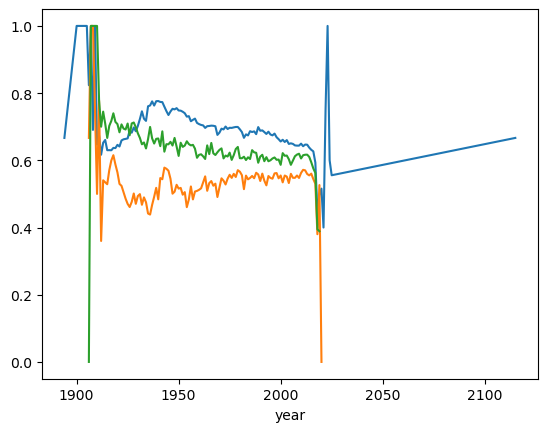

In [12]:
thirdWheel = cast[cast.n==3]
baz = thirdWheel.groupby(['year','type']).size().unstack().fillna(0)
baz['totalRoles'] = baz['actor']+baz['actress']
baz['manFrac'] = baz['actor']/baz['totalRoles']
foo['manFrac'].plot() + (bar['manFrac'].plot() + baz['manFrac'].plot())